{'exec_type': '1', 'num_adapters': ' 16', 'throughput': ' 1.77'}
{'exec_type': '1', 'num_adapters': ' 32', 'throughput': ' 2.46'}
{'exec_type': '1', 'num_adapters': ' 64', 'throughput': ' 1.26'}
{'exec_type': '1', 'num_adapters': '128', 'throughput': ' 0.82'}
{'exec_type': '2', 'num_adapters': ' 16', 'throughput': ' 2.54'}
{'exec_type': '2', 'num_adapters': ' 32', 'throughput': ' 1.91'}
{'exec_type': '2', 'num_adapters': ' 64', 'throughput': ' 1.79'}
{'exec_type': '2', 'num_adapters': '128', 'throughput': ' 1.67'}
{'exec_type': '3', 'num_adapters': ' 16', 'throughput': ' 12.77'}
{'exec_type': '3', 'num_adapters': ' 32', 'throughput': ' 12.78'}
{'exec_type': '3', 'num_adapters': ' 64', 'throughput': ' 12.96'}
{'exec_type': '3', 'num_adapters': '128', 'throughput': ' 12.49'}


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

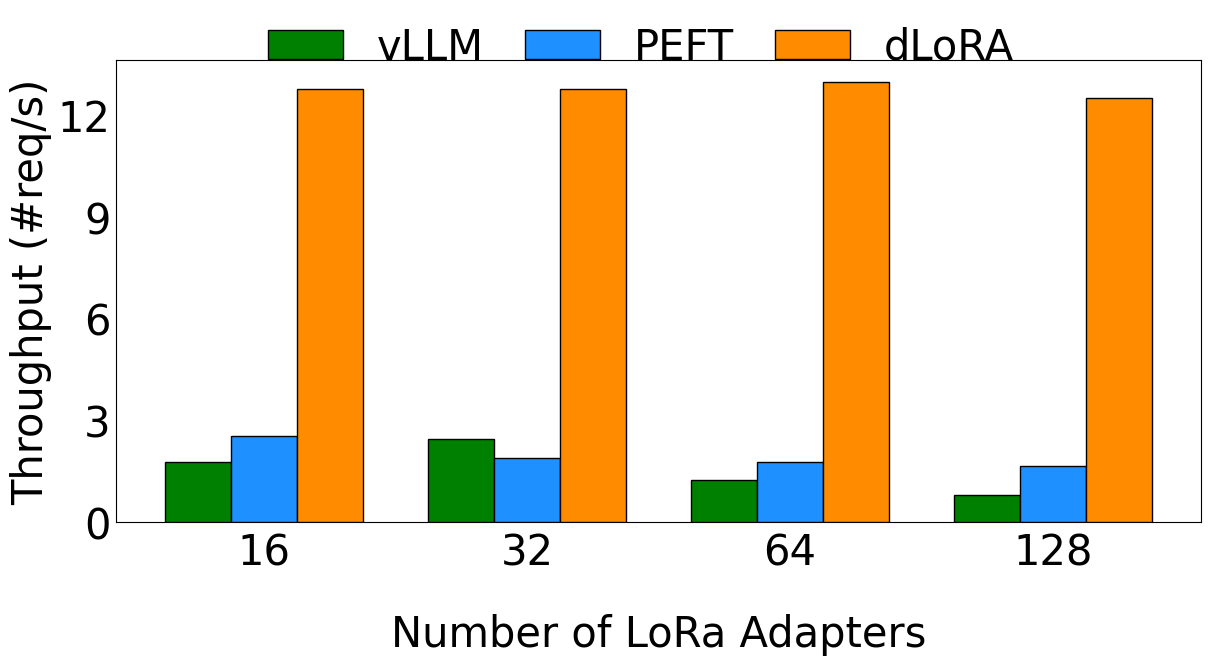

In [1]:

%matplotlib inline
import os
import sys
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv

# constants
num_size = 4
num_bars = 3
num_subfigs = 1

throughput_dict = {0: [], 1: [], 2: []}
num_adapter_list = [16, 32, 64, 128]

file_path = "./fig12.csv"
with open(file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)

    for row in reader:
        print(row)
        exec_type = int(row['exec_type']) - 1
        num_adapters = int(row['num_models'])

        throughput = float(row['throughput'])
        throughput_dict[exec_type].append(throughput)
        assert num_adapters == num_adapter_list[len(throughput_dict[exec_type]) - 1]

# Set font and figure size
font_size = 30
plt.rc('font',**{'size': font_size, 'family': 'Arial'})
plt.rc('pdf',fonttype = 42)

fig_size = (14, 6)
fig, axes = plt.subplots(figsize=fig_size)
matplotlib.rcParams['xtick.minor.size'] = 4.
matplotlib.rcParams['xtick.major.size'] = 8.
matplotlib.rcParams['ytick.major.size'] = 6.
matplotlib.rcParams['ytick.minor.visible'] = True
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

# settings
colors = {0: 'green', 1: 'dodgerblue', 2: 'darkorange'}
labels = {0: 'vLLM', 1: 'PEFT', 2: 'dLoRA'}

width = 0.05
indexes = [[0.2*i+0.1+width*j for i in range(num_size)] for j in range(num_bars)]

# x-axis setting
x_label = 'Number of LoRa Adapters'
x_ticks = []
for i in range(num_size):
    x_ticks.append(sum(indexes[j][i] for j in range(num_bars))/num_bars)
x_ticklabels = ['16', '32', '64', '128']

# y-axis setting
y_label = 'Throughput (#req/s)'
y_ticks = np.arange(0, 15, step=3)

axes.set_xlabel(x_label, labelpad=28)
axes.set_xticks(x_ticks)
axes.set_xticklabels(x_ticklabels)
axes.get_xaxis().set_tick_params(direction='in', pad=7)
axes.get_xaxis().set_tick_params(which='minor', direction='in')

axes.set_ylabel(y_label)
axes.set_yticks(y_ticks)
axes.yaxis.set_ticks_position('left')
axes.tick_params(bottom=False, top=False, left=False, right=False)
axes.minorticks_off()
axes.get_yaxis().set_tick_params(direction='in', pad=4)
axes.get_yaxis().set_tick_params(which='minor', direction='in')

# Plot bars
bars = [[] for i in range(num_bars)]
for i in range(num_bars):
    bars[i] = axes.bar(indexes[i], throughput_dict[i], width, label=labels[i], edgecolor='black', zorder=3, color = colors[i])

fig.legend(handles=[bars[0], bars[1], bars[2]], handlelength=1.8, 
           ncol=num_bars, loc='upper center', bbox_to_anchor=(0.5, 1.0), frameon=False, prop={'size':font_size}, columnspacing = 1)

file_path = './figure12.pdf'
plt.savefig(file_path, bbox_inches='tight', transparent=True)